<a href="https://colab.research.google.com/github/shirley-debug/LDA---Topic-Analysis/blob/main/LDA_Attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

There are two LDA models and one attempt of K-Means Clustering used in this section. The following code cannot run on its own without skipping some sections
* The LDA section uses classic gensim LDAModel
* The LDA Mallet section uses genim LDAMallet model which is a variation of the first classic LDAModel. LDA Mallet works slightly better in our case here
* For both LDA models, there are sections to loop through different number of topics and find the coherence score. Make sure to skip this after you found an best-fitting value of number of topics
* The last section is using k-means to cluster. Not a lot of attempts are made here.
Please feel free to contact me (s326lin@uwaterloo.ca) if anything in this code is not clear

In [ ]:
!pip install --upgrade gensim==3.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.2 MB 13.5 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


# Reading data

In [ ]:
import pandas as pd
from google.colab import files
import io

In [ ]:
uploaded = files.upload()

Saving rawdata_cleaned.csv to rawdata_cleaned.csv


In [ ]:
data = pd.read_csv('rawdata_cleaned.csv')

# Cleaning

#### Importing and downloading necessary libraries/packages

In [ ]:
# Use to display progress bar when running cells
from tqdm.notebook import tqdm
tqdm().pandas()

0it [00:00, ?it/s]

In [ ]:
from nltk import pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
import itertools
from itertools import chain # to flatten list of sentences of tokens into list of tokens
import numpy as np
from nltk.corpus import stopwords

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Lower case all utterance

In [ ]:
for index, row in data.iterrows():
  text = row['Utterance']
  text = text.lower()
  data.loc[index, 'Utterance'] = text

#### Change contractions and slangs

In [ ]:
contractions_slangs = {
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "cannot": "can not",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have",
    "gonna": "going to",
    "wanna": "want to"
}

In [ ]:
for index, row in data.iterrows():
  text = row['Utterance']
  for word in contractions_slangs:
    if word in text:
        text = text.replace(word, contractions_slangs[word])
  data.loc[index, 'Utterance'] = text

#### Tokenizing

In [ ]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data['sentences'] = data.Utterance.progress_map(sent_tokenize)
data['sentences'].head(1).tolist()[0][:3] # Print the first 3 sentences of the 1st article

  0%|          | 0/5301 [00:00<?, ?it/s]

['all right.',
 'this is the jar by the way.',
 'the owner, this is the products that we are supposed to wrap']

In [ ]:
data['tokens_sentences'] = data['sentences'].progress_map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])
print(data['tokens_sentences'].head(1).tolist()[0][:3])

  0%|          | 0/5301 [00:00<?, ?it/s]

[['all', 'right', '.'], ['this', 'is', 'the', 'jar', 'by', 'the', 'way', '.'], ['the', 'owner', ',', 'this', 'is', 'the', 'products', 'that', 'we', 'are', 'supposed', 'to', 'wrap']]


#### Lemmatizing with POS tagging

In [ ]:
data['POS_tokens'] = data['tokens_sentences'].progress_map(lambda tokens_sentences: [pos_tag(tokens) for tokens in tokens_sentences])
print(data['POS_tokens'].head(1).tolist()[0][:3])

  0%|          | 0/5301 [00:00<?, ?it/s]

[[('all', 'DT'), ('right', 'NN'), ('.', '.')], [('this', 'DT'), ('is', 'VBZ'), ('the', 'DT'), ('jar', 'NN'), ('by', 'IN'), ('the', 'DT'), ('way', 'NN'), ('.', '.')], [('the', 'DT'), ('owner', 'NN'), (',', ','), ('this', 'DT'), ('is', 'VBZ'), ('the', 'DT'), ('products', 'NNS'), ('that', 'IN'), ('we', 'PRP'), ('are', 'VBP'), ('supposed', 'VBN'), ('to', 'TO'), ('wrap', 'VB')]]


In [ ]:
# Inspired from https://stackoverflow.com/a/15590384
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

lemmatizer = WordNetLemmatizer()

In [ ]:
# Lemmatizing each word with its POS tag, in each sentence
data['tokens_sentences_lemmatized'] = data['POS_tokens'].progress_map(
    lambda list_tokens_POS: [
        [
            lemmatizer.lemmatize(el[0], get_wordnet_pos(el[1])) 
            if get_wordnet_pos(el[1]) != '' else el[0] for el in tokens_POS
        ] 
        for tokens_POS in list_tokens_POS
    ]
)

  0%|          | 0/5301 [00:00<?, ?it/s]

In [ ]:
data['tokens_sentences_lemmatized'].head(1).tolist()[0][:3]

[['all', 'right', '.'],
 ['this', 'be', 'the', 'jar', 'by', 'the', 'way', '.'],
 ['the',
  'owner',
  ',',
  'this',
  'be',
  'the',
  'product',
  'that',
  'we',
  'be',
  'suppose',
  'to',
  'wrap']]

#### Regrouping tokens and removing stop words

In [ ]:
irrelevant_words = [
    "us",
    "thought",
    "said",
    "think",
    "say",
    "thank",
    "went",
    "yeah",
    "yea",
    "yes",
    "awesome",
    "excellent",
    "great",
    "like",
    "ok",
    "okay",
    "so",
    "cool",
    "sure",
    "thing",
    "go",
    "went",
    "get",
    "also",
    "got",
    "would",
    "could",
    "tri",
    "guy",
    "dude",
    "soon",
    "stuff",
    "huh",
    "oh",
    "mm",
    "uh",
    "um",
    "right",
    "know",
    "one",
    "something",
    "candy",
    "wrap",
    "wrapper",
    "well",
    "kind",
    "mean",
    "want",
    "definitely",
    "good",
    "actually",
    "basically",
    "yep",
    "maybe", 
    "might", 
    "may",
    "need",
    "come",
    "side",
    "part"
]

In [ ]:
list_of_words = data['tokens_sentences'].to_list()
list_of_words = list(itertools.chain.from_iterable(list_of_words))
list_of_words = list(itertools.chain.from_iterable(list_of_words))
print(list_of_words)

['all', 'right', '.', 'this', 'is', 'the', 'jar', 'by', 'the', 'way', '.', 'the', 'owner', ',', 'this', 'is', 'the', 'products', 'that', 'we', 'are', 'supposed', 'to', 'wrap', 'please', 'try', 'one', 'it', 'is', 'actually', 'pretty', 'good', '.', 'i', 'believe', 'so', '.', 'i', 'do', 'not', 'want', 'one', '.', 'no', 'i', 'find', 'like', 'chewing', 'this', 'stuff', '.', 'i', 'have', 'to', 'get', 'some', 'work', 'on', 'my', 'teeth', 'later', 'today', '.', 'so', 'yeah', ',', 'we', 'just', 'thought', 'we', 'would', 'bring', 'this', 'like', 'you', 'could', 'like', 'actually', 'see', 'it', '?', 'no', ',', 'i', 'have', 'seen', 'it', '.', 'oscar', 'told', 'me', 'they', 'sell', 'those', 'at', 'vincenzo', "'s", 'they', 'have', 'their', 'candy', '.', 'yeah', ',', 'that', 'is', 'where', 'i', 'got', 'this', 'one', '.', 'they', 'come', 'in', 'the', 'jar', '.', 'yep', '.', 'cool', '.', 'yeah', '.', 'so', 'this', 'is', 'kind', 'of', 'look', 'and', 'feel', 'that', 'a', 'look', ',', 'you', 'know', ',', 

In [ ]:
df = pd.value_counts(np.array(list_of_words)).rename_axis('words').reset_index(name='occurrence')
print(df)

          words  occurrence
0             ,       16327
1             .       15598
2           the       11990
3            is        8364
4           you        8288
...         ...         ...
6692       leak           1
6693  enclosing           1
6694  splashing           1
6695   chambers           1
6696   rotators           1

[6697 rows x 2 columns]


In [ ]:
df.to_csv("words occurrence.csv", index = False)

In [ ]:
max_occurrence = 350
df = df[df['occurrence'] > max_occurrence]
frequent_words = df['words'].to_list()
print(frequent_words)

[',', '.', 'the', 'is', 'you', 'it', 'to', 'and', 'that', 'so', 'we', 'this', 'a', 'of', 'i', '?', 'not', 'like', 'have', 'be', 'are', 'in', 'do', 'yeah', 'can', 'will', 'right', 'what', 'for', 'but', 'if', 'one', 'then', 'know', 'okay', 'just', 'they', 'on', 'because', 'would', 'candy', 'there', 'with', 'or', 'think', 'here', 'going', 'your', 'as', 'he', 'how', 'need', 'some', 'when', 'want', 'now', 'was', 'up', 'all', 'make', 'at', 'about', 'go', 'maybe', 'put', 'does', 'from', 'out', 'machine', 'get', 'thing', 'two', 'no', 'yes', 'well', 'time', 'more', 'design', 'something', 'where', 'them', 'way', 'these', 'good', 'kind', 'actually', 'an', 'by', 'wrapping', 'see', 'cut', 'am', 'wrapper', 'down', 'got', 'us', 'could', 'sure', 'use', 'should', 'has', 'other', 'really', 'only', 'say']


In [ ]:
my_stopwords = stopwords.words('english') + irrelevant_words

In [ ]:
print(my_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
data['tokens'] = data['tokens_sentences_lemmatized'].map(lambda sentences: list(chain.from_iterable(sentences)))
data['tokens'] = data['tokens'].map(lambda tokens: [token.lower() for token in tokens if token.isalpha() 
                                                    and token.lower() not in my_stopwords and len(token)>1])

In [ ]:
data['tokens'].head(1).tolist()[0][:30]

['jar', 'way', 'owner', 'product', 'suppose']

# LDA

## Data preparation

#### Prepare bi-grams and tri-grams

In [ ]:
import gensim
from gensim.models import Phrases

In [ ]:
tokens = data['tokens'].tolist()

In [ ]:
docs_tokens = []
for week_num in range(5):
  subdf = data[data["Week"]==week_num+1]
  doc = subdf['tokens'].to_list()
  doc = list(itertools.chain.from_iterable(doc))
  docs_tokens.append(doc)

In [ ]:
docs_tokens = []
for team_num in range(6):
  week = 5
  if team_num == 4: #team 5 has 6 weeks
    week = 6
  for week_num in range(week):
    subdf = data[data["Team"]==team_num+1]
    subdf = data[data["Week"]==week_num+1]
    doc = subdf['tokens'].to_list()
    doc = list(itertools.chain.from_iterable(doc))
    docs_tokens.append(doc)

In [ ]:
bigram_model = Phrases(docs_tokens)
trigram_model = Phrases(bigram_model[docs_tokens], min_count=5, threshold=10)
docs_tokens = list(trigram_model[bigram_model[docs_tokens]])

#### Remove not important words (filter extreme words)

In [ ]:
filter_extreme_words = ['able', 'action', 'actual', 'add', 'agree', 'ahead', 'allow', 'almost', 'along', 'already', 'always', 'amount', 'angle', 'another', 'answer', 'anything', 'anyway', 'area', 'arm', 'around', 'ask', 'assume', 'away', 'axis', 'back', 'back_forth', 'bad', 'base', 'become', 'believe', 'best', 'big', 'bit', 'box', 'break', 'bring', 'bunch', 'buy', 'call', 'caramel', 'case', 'cause', 'certain', 'change', 'cheap', 'chocolate', 'clean', 'clear', 'close', 'company', 'complicate', 'component', 'condition', 'connect', 'consider', 'contact', 'control', 'correct', 'course', 'cover', 'criterion', 'current', 'currently', 'cutter', 'cutting', 'cycle', 'day', 'decide', 'decision', 'define', 'degree', 'depend', 'detail', 'develop', 'device', 'difference', 'different', 'discuss', 'dollar', 'double', 'draw', 'drive', 'drop', 'easily', 'easy', 'edge', 'either', 'eliminate', 'else', 'end', 'enough', 'entire', 'equipment', 'essentially', 'even', 'eventually', 'every', 'everything', 'exactly', 'example', 'explain', 'extra', 'face', 'fact', 'fall', 'far', 'fast', 'feature', 'fee', 'feed', 'feeding', 'feel', 'figure', 'fill', 'final', 'find', 'fine', 'finger', 'finish', 'first', 'fit', 'five', 'fix', 'flat', 'flow', 'focus', 'fold', 'follow', 'force', 'forward', 'four', 'free', 'full', 'function', 'give', 'group', 'guess', 'half', 'hand', 'happen', 'hard', 'help', 'high', 'hit', 'hold', 'hour', 'huge', 'idea', 'important', 'inch', 'include', 'increase', 'inside', 'instead', 'interesting', 'issue', 'jam', 'jar', 'jaw', 'keep', 'large', 'last', 'least', 'leave', 'length', 'less', 'level', 'line', 'little', 'little_bit', 'load', 'long', 'lot', 'low', 'main', 'manual', 'many', 'matter', 'maximum', 'meet', 'meeting', 'mention', 'middle', 'mind', 'minute', 'model', 'mold', 'money', 'motion', 'motor', 'move', 'much', 'never', 'new', 'next', 'nice', 'nothing', 'number', 'obviously', 'open', 'oppose', 'option', 'order', 'otherwise', 'outside', 'overlap', 'pay', 'people', 'per', 'perfectly', 'person', 'pick', 'piece', 'place', 'plan', 'plastic', 'plate', 'plus', 'point', 'portion', 'position', 'possibility', 'possible', 'pre', 'presentation', 'press', 'pretty', 'price', 'print', 'problem', 'product', 'production', 'project', 'provide', 'pull', 'pusher', 'question', 'quickly', 'rate', 'rather', 'real', 'reason', 'rectangular', 'reduce', 'remember', 'remove', 'rest', 'row', 'rubber', 'run', 'saw', 'scale', 'second', 'seem', 'sell', 'send', 'sense', 'sequence', 'set', 'shaft', 'shape', 'sheet', 'show', 'similar', 'simple', 'since', 'single', 'sit', 'six', 'size', 'slab', 'slide', 'slider', 'slow', 'small', 'soft', 'solution', 'somebody', 'somehow', 'someone', 'sometimes', 'somewhere', 'sorry', 'sort', 'speed', 'spend', 'spring', 'square', 'stage', 'start', 'station', 'stay', 'step', 'stick', 'still', 'stop', 'straight', 'suggest', 'suppose', 'surface', 'system', 'table', 'take', 'talk', 'tell', 'term', 'test', 'thin', 'though', 'three', 'throughput', 'timing', 'today', 'together', 'top', 'total', 'touch', 'towards', 'tray', 'try', 'turn', 'type', 'understand', 'user', 'usually', 'versus', 'vertical', 'video', 'wait', 'week', 'weight', 'whatever', 'whole', 'width', 'within', 'without', 'wonder', 'worry', 'wrong', 'year', 'yet']

In [ ]:
filter_extreme_words_all = ['able', 'action', 'actual', 'add', 'agree', 'ahead', 'allow', 'almost', 'along', 'already', 'always', 'amount', 'angle', 'another', 'answer', 'anything', 'anyway', 'area', 'arm', 'around', 'ask', 'assembly', 'assume', 'automate', 'automation', 'away', 'axis', 'back', 'back_forth', 'bad', 'base', 'become', 'believe', 'belt', 'best', 'big', 'bit', 'blade', 'bottom', 'box', 'break', 'bring', 'budget', 'build', 'bunch', 'business', 'buy', 'calculate', 'call', 'caramel', 'case', 'cause', 'cellophane', 'certain', 'challenge', 'change', 'cheap', 'chocolate', 'clamp', 'clean', 'clear', 'client', 'close', 'company', 'component', 'concept', 'concern', 'condition', 'connect', 'consider', 'contact', 'control', 'conveyor', 'conveyor_belt', 'correct', 'cost', 'couple', 'course', 'cover', 'create', 'criterion', 'current', 'currently', 'customer', 'cutter', 'cutting', 'cycle', 'day', 'decide', 'decision', 'define', 'degree', 'depend', 'detail', 'develop', 'device', 'difference', 'different', 'dimension', 'direction', 'discuss', 'dollar', 'double', 'double_twist', 'draw', 'drive', 'drop', 'easily', 'easy', 'edge', 'either', 'eliminate', 'else', 'end', 'enough', 'entire', 'equipment', 'essentially', 'even', 'eventually', 'every', 'everything', 'exactly', 'example', 'expensive', 'explain', 'extra', 'face', 'fact', 'fall', 'far', 'fast', 'feature', 'fee', 'feed', 'feeding', 'feel', 'figure', 'fill', 'final', 'find', 'fine', 'finger', 'finish', 'first', 'fit', 'five', 'fix', 'flat', 'flip', 'flow', 'focus', 'fold', 'follow', 'footprint', 'force', 'forward', 'four', 'full', 'function', 'gear', 'give', 'grab', 'gravity', 'grip', 'gripper', 'grippers', 'guess', 'half', 'hand', 'happen', 'hard', 'hear', 'help', 'high', 'hit', 'hold', 'hour', 'huge', 'idea', 'important', 'inch', 'include', 'increase', 'industry', 'inside', 'instead', 'interesting', 'issue', 'jam', 'jar', 'jaw', 'job', 'keep', 'large', 'last', 'last_week', 'least', 'leave', 'length', 'less', 'let', 'level', 'line', 'little', 'little_bit', 'load', 'long', 'look', 'lot', 'low', 'main', 'maintenance', 'manual', 'manually', 'many', 'material', 'matter', 'maximum', 'mechanism', 'meet', 'meeting', 'mention', 'middle', 'mind', 'minute', 'model', 'mold', 'money', 'motion', 'motor', 'move', 'much', 'never', 'new', 'next', 'nice', 'nothing', 'number', 'obviously', 'open', 'operation', 'operator', 'oppose', 'option', 'order', 'otherwise', 'outside', 'overlap', 'part', 'pay', 'people', 'per', 'perfectly', 'person', 'pick', 'piece', 'place', 'plan', 'plastic', 'plate', 'plus', 'point', 'portion', 'position', 'possibility', 'possible', 'pre', 'presentation', 'press', 'pretty', 'price', 'print', 'probably', 'problem', 'product', 'production', 'project', 'prototype', 'provide', 'pull', 'push', 'pusher', 'question', 'quickly', 'rate', 'rather', 'real', 'reason', 'rectangular', 'reduce', 'remember', 'remove', 'require', 'requirement', 'rest', 'roll', 'roller', 'rolling', 'rotate', 'row', 'rubber', 'run', 'saw', 'scale', 'second', 'seem', 'sell', 'send', 'sense', 'sequence', 'set', 'shaft', 'shape', 'sheet', 'show', 'side', 'similar', 'simple', 'since', 'single', 'sit', 'six', 'size', 'slab', 'slide', 'slider', 'slow', 'small', 'soft', 'solution', 'somebody', 'somehow', 'someone', 'sometimes', 'somewhere', 'sorry', 'sort', 'space', 'specification', 'speed', 'spend', 'spin', 'spring', 'square', 'stage', 'start', 'station', 'stay', 'step', 'stepper_motor', 'stick', 'still', 'stop', 'straight', 'suggest', 'suppose', 'surface', 'system', 'table', 'take', 'talk', 'tell', 'temperature', 'term', 'test', 'thin', 'though', 'three', 'throughput', 'timing', 'today', 'together', 'tolerance', 'top', 'total', 'touch', 'towards', 'tray', 'try', 'turn', 'twice', 'twist', 'twisting', 'type', 'understand', 'user', 'usually', 'versus', 'vertical', 'video', 'view', 'wait', 'week', 'weight', 'whatever', 'wheel', 'whole', 'width', 'within', 'without', 'worry', 'wrong', 'year', 'yet']

In [ ]:
filter_extreme_words90 = ['able', 'action', 'actual', 'add', 'agree', 'ahead', 'allow', 'almost', 'along', 'already', 'always', 'amount', 'angle', 'another', 'answer', 'anything', 'anyway', 'area', 'arm', 'around', 'ask', 'assume', 'away', 'axis', 'back', 'back_forth', 'bad', 'base', 'become', 'believe', 'best', 'big', 'bit', 'box', 'break', 'bring', 'bunch', 'buy', 'call', 'caramel', 'case', 'cause', 'certain', 'change', 'cheap', 'chocolate', 'clean', 'clear', 'close', 'company', 'complicate', 'component', 'condition', 'connect', 'consider', 'contact', 'control', 'correct', 'course', 'cover', 'criterion', 'current', 'currently', 'cutter', 'cutting', 'cycle', 'day', 'decide', 'decision', 'define', 'degree', 'depend', 'detail', 'develop', 'device', 'difference', 'different', 'discuss', 'dollar', 'double', 'draw', 'drive', 'drop', 'easily', 'easy', 'edge', 'either', 'eliminate', 'else', 'end', 'enough', 'entire', 'equipment', 'essentially', 'even', 'eventually', 'every', 'everything', 'exactly', 'example', 'explain', 'extra', 'face', 'fact', 'fall', 'far', 'fast', 'feature', 'fee', 'feed', 'feeding', 'feel', 'figure', 'fill', 'final', 'find', 'fine', 'finger', 'finish', 'first', 'fit', 'five', 'fix', 'flat', 'flow', 'focus', 'fold', 'follow', 'force', 'forward', 'four', 'free', 'full', 'function', 'give', 'group', 'guess', 'half', 'hand', 'happen', 'hard', 'help', 'high', 'hit', 'hold', 'hour', 'huge', 'idea', 'important', 'inch', 'include', 'increase', 'inside', 'instead', 'interesting', 'issue', 'jam', 'jar', 'jaw', 'keep', 'large', 'last', 'least', 'leave', 'length', 'less', 'level', 'line', 'little', 'little_bit', 'load', 'long', 'lot', 'low', 'main', 'manual', 'many', 'matter', 'maximum', 'meet', 'meeting', 'mention', 'middle', 'mind', 'minute', 'model', 'mold', 'money', 'motion', 'motor', 'move', 'much', 'never', 'new', 'next', 'nice', 'nothing', 'number', 'obviously', 'open', 'oppose', 'option', 'order', 'otherwise', 'outside', 'overlap', 'pay', 'people', 'per', 'perfectly', 'person', 'pick', 'piece', 'place', 'plan', 'plastic', 'plate', 'plus', 'point', 'portion', 'position', 'possibility', 'possible', 'pre', 'presentation', 'press', 'pretty', 'price', 'print', 'problem', 'product', 'production', 'project', 'provide', 'pull', 'pusher', 'question', 'quickly', 'rate', 'rather', 'real', 'reason', 'rectangular', 'reduce', 'remember', 'remove', 'rest', 'row', 'rubber', 'run', 'saw', 'scale', 'second', 'seem', 'sell', 'send', 'sense', 'sequence', 'set', 'shaft', 'shape', 'sheet', 'show', 'similar', 'simple', 'since', 'single', 'sit', 'six', 'size', 'slab', 'slide', 'slider', 'slow', 'small', 'soft', 'solution', 'somebody', 'somehow', 'someone', 'sometimes', 'somewhere', 'sorry', 'sort', 'speed', 'spend', 'spring', 'square', 'stage', 'start', 'station', 'stay', 'step', 'stick', 'still', 'stop', 'straight', 'suggest', 'suppose', 'surface', 'system', 'table', 'take', 'talk', 'tell', 'term', 'test', 'thin', 'though', 'three', 'throughput', 'timing', 'today', 'together', 'top', 'total', 'touch', 'towards', 'tray', 'try', 'turn', 'type', 'understand', 'user', 'usually', 'versus', 'vertical', 'video', 'wait', 'week', 'weight', 'whatever', 'whole', 'width', 'within', 'without', 'wonder', 'worry', 'wrong', 'year', 'yet', 'absolutely', 'action', 'add', 'always', 'another', 'anything', 'around', 'ask', 'back', 'big', 'build', 'case', 'change', 'close', 'cut', 'cycle_time', 'cylinder', 'deal', 'decide', 'design', 'different', 'direction', 'door', 'else', 'end', 'engineering', 'enough', 'ensure', 'even', 'every', 'everything', 'exactly', 'example','factor', 'feed', 'first', 'five', 'fold', 'four', 'fun', 'give', 'grab', 'guess', 'hand', 'idea', 'ideal', 'initially', 'issue', 'keep', 'last', 'let', 'little', 'little_bit', 'load', 'long', 'look', 'lot', 'machine', 'make', 'millimeter', 'motor', 'move', 'much', 'next', 'open', 'option', 'output', 'paper', 'person', 'place', 'point', 'pre_cut', 'printing', 'probably', 'push', 'put', 'question', 'ready', 'really', 'roll', 'roller', 'run', 'second', 'section', 'see', 'sense', 'shape', 'short', 'show', 'size','small','spot', 'start', 'step', 'still', 'take', 'talk', 'test', 'three', 'time', 'top', 'trade', 'travel', 'try','two', 'use', 'way', 'week', 'whatever', 'work', 'wrapping']

In [ ]:
for n in range(len(docs_tokens)):
  print(len(docs_tokens[n]))

12650
9308
9178
11735
10565
12650
9308
9178
11735
10565
12650
9308
9178
11735
10565
12650
9308
9178
11735
10565
12650
9308
9178
11735
10565
2517
12650
9308
9178
11735
10565


In [ ]:
not_important_words = frequent_words

In [ ]:
print(not_important_words)

[',', '.', 'the', 'is', 'you', 'it', 'to', 'and', 'that', 'so', 'we', 'this', 'a', 'of', 'i', '?', 'not', 'like', 'have', 'be', 'are', 'in', 'do', 'yeah', 'can', 'will', 'right', 'what', 'for', 'but', 'if', 'one', 'then', 'know', 'okay', 'just', 'they', 'on', 'because', 'would', 'candy', 'there', 'with', 'or', 'think', 'here', 'going', 'your', 'as', 'he', 'how', 'need', 'some', 'when', 'want', 'now', 'was', 'up', 'all', 'make', 'at', 'about', 'go', 'maybe', 'put', 'does', 'from', 'out', 'machine', 'get', 'thing', 'two', 'no', 'yes', 'well', 'time', 'more', 'design', 'something', 'where', 'them', 'way', 'these', 'good', 'kind', 'actually', 'an', 'by', 'wrapping', 'see', 'cut', 'am', 'wrapper', 'down', 'got', 'us', 'could', 'sure', 'use', 'should', 'has', 'other', 'really', 'only', 'say']


In [ ]:
for n in range(len(docs_tokens)):
  for word in docs_tokens[n]:
    if word in not_important_words:
      docs_tokens[n].remove(word)

In [ ]:
for n in range(len(docs_tokens)):
  print(len(docs_tokens[n]))

11162
8305
8106
10436
9433
11162
8305
8106
10436
9433
11162
8305
8106
10436
9433
11162
8305
8106
10436
9433
11162
8305
8106
10436
9433
2312
11162
8305
8106
10436
9433


#### Prepare objects for LDA gensim implementation

In [ ]:
from gensim import corpora

In [ ]:
dictionary_LDA = corpora.Dictionary(docs_tokens)
# dict_before = dictionary_LDA.token2id
# print(len(dictionary_LDA.token2id))
dictionary_LDA.filter_extremes(no_below=5, no_above = 0.8, keep_n= 100000)
# dict_after = dictionary_LDA.token2id
# print(len(dictionary_LDA.token2id))
corpus = [dictionary_LDA.doc2bow(tok) for tok in docs_tokens]

In [ ]:
# removed_words = []
# dict_after_keys = list(dict_after.keys())
# for key in dict_before:
#   if key not in dict_after_keys:
#     removed_words.append(key)
# print(removed_words)

In [ ]:
print(dictionary_LDA)

Dictionary(8276 unique tokens: ['ability', 'able_bang_robot', 'able_summarize', 'able_take_apart', 'able_tune']...)


In [ ]:
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 4), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 7), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 3), (99, 1), (100, 2), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 5), (107, 3), (108, 1), (109, 2), (110, 1)

## Running LDA

#### Importing

In [ ]:
from gensim import models
import numpy as np
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

### Run on one certain number of topic

In [ ]:
np.random.seed(123456)
num_topics = 9
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=100, iterations = 400, alpha=500 , \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


CPU times: user 2min 2s, sys: 1min 15s, total: 3min 17s
Wall time: 1min 50s


In [ ]:
# top_topics = lda_model.top_topics(corpus)

# # Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
# avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
# print('Average topic coherence: %.4f.' % avg_topic_coherence)

# from pprint import pprint
# pprint(top_topics)

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic)
    print()
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs_tokens, dictionary=dictionary_LDA, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: '+ str(coherence_lda) )

0: 0.014*"rotate" + 0.008*"blade" + 0.008*"grip" + 0.007*"make" + 0.007*"push" + 0.007*"still" + 0.007*"look" + 0.006*"time" + 0.006*"work" + 0.006*"motor" + 0.006*"close" + 0.005*"small" + 0.005*"finger" + 0.005*"belt" + 0.005*"cut" + 0.005*"attach" + 0.004*"see" + 0.004*"slot" + 0.004*"guide" + 0.004*"start"

1: 0.032*"push" + 0.014*"concept" + 0.014*"mechanism" + 0.010*"grab" + 0.009*"direction" + 0.009*"prototype" + 0.008*"work" + 0.008*"let" + 0.006*"probably" + 0.006*"make" + 0.006*"design" + 0.005*"see" + 0.005*"cut" + 0.005*"use" + 0.005*"method" + 0.005*"much" + 0.005*"rotate" + 0.005*"every" + 0.005*"pusher" + 0.004*"two"

2: 0.022*"machine" + 0.014*"customer" + 0.008*"concept" + 0.007*"let" + 0.007*"use" + 0.007*"process" + 0.007*"look" + 0.006*"make" + 0.006*"problem" + 0.006*"solution" + 0.005*"put" + 0.005*"ask" + 0.005*"give" + 0.005*"temperature" + 0.005*"constraint" + 0.004*"question" + 0.004*"twist" + 0.004*"probably" + 0.004*"design" + 0.004*"requirement"

3: 0.022*"

In [ ]:
# Compute Perplexity: a measure of how good the model is. lower the better.
print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 


Perplexity:  -7.8958847200590645


### Loop through different number of topics

In [ ]:
co_score = []
per_score = []
models_list = []
for n in range(6, 15):
  np.random.seed(123456)
  print("On Number of Topics = " + str(n))
  lda_model = models.LdaModel(corpus, num_topics=n, \
                                  id2word=dictionary_LDA, \
                                  passes=100, iterations = 400, alpha=500, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))
  coherence_model_lda = CoherenceModel(model=lda_model, texts=docs_tokens, dictionary=dictionary_LDA, coherence='c_v')

  coherence_lda = coherence_model_lda.get_coherence()
  co_score.append(coherence_lda)
  per_score.append(lda_model.log_perplexity(corpus))
  models_list.append(lda_model)

On Number of Topics = 6


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


On Number of Topics = 7
On Number of Topics = 8
On Number of Topics = 9
On Number of Topics = 10
On Number of Topics = 11
On Number of Topics = 12
On Number of Topics = 13
On Number of Topics = 14


In [ ]:
for n in range (6,15):
  for i,topic in models_list[n-6].show_topics(formatted=True, num_topics=n, num_words=20):
      print(str(i)+": "+ topic)
      print()
  coherence_model_lda = CoherenceModel(model=models_list[n-6], texts=docs_tokens, dictionary=dictionary_LDA, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  print('Coherence Score: '+ str(coherence_lda) + "\n" )

0: 0.012*"rotate" + 0.008*"make" + 0.007*"grip" + 0.007*"blade" + 0.006*"look" + 0.006*"time" + 0.006*"push" + 0.006*"still" + 0.005*"belt" + 0.005*"paper" + 0.005*"work" + 0.005*"motor" + 0.005*"cut" + 0.005*"close" + 0.004*"way" + 0.004*"two" + 0.004*"move" + 0.004*"slot" + 0.004*"start" + 0.004*"see"

1: 0.028*"push" + 0.014*"mechanism" + 0.012*"concept" + 0.009*"prototype" + 0.008*"rotate" + 0.008*"let" + 0.008*"work" + 0.008*"direction" + 0.007*"grab" + 0.007*"roll" + 0.007*"probably" + 0.006*"make" + 0.006*"design" + 0.006*"cut" + 0.006*"see" + 0.005*"look" + 0.005*"use" + 0.005*"time" + 0.005*"put" + 0.004*"motor"

2: 0.017*"machine" + 0.011*"customer" + 0.008*"make" + 0.008*"concept" + 0.007*"look" + 0.007*"use" + 0.007*"process" + 0.007*"let" + 0.007*"roll" + 0.006*"twist" + 0.006*"probably" + 0.006*"problem" + 0.006*"put" + 0.005*"material" + 0.005*"solution" + 0.005*"question" + 0.004*"ask" + 0.004*"wrapping" + 0.004*"requirement" + 0.004*"space"

3: 0.029*"look" + 0.026*"ma

In [ ]:
for n in range (6,15):
  print('\nNumber of Topics: ' + str(n) + '\nCoherence Score: '+ str(co_score[n-6]) + '\nPerplexity Score: '+ str(per_score[n-6]))


Number of Topics: 6
Coherence Score: 0.2546499454866778
Perplexity Score: -8.100655699695444

Number of Topics: 7
Coherence Score: 0.2584547175767406
Perplexity Score: -8.114375882270409

Number of Topics: 8
Coherence Score: 0.2679768829085861
Perplexity Score: -8.124833089943952

Number of Topics: 9
Coherence Score: 0.26264219801908417
Perplexity Score: -8.137536786942354

Number of Topics: 10
Coherence Score: 0.2606464564039352
Perplexity Score: -8.151173802638896

Number of Topics: 11
Coherence Score: 0.25951597929979153
Perplexity Score: -8.165713752348637

Number of Topics: 12
Coherence Score: 0.26293446986664554
Perplexity Score: -8.180994489812502

Number of Topics: 13
Coherence Score: 0.2582275590139687
Perplexity Score: -8.081515452389125

Number of Topics: 14
Coherence Score: 0.2572812910899809
Perplexity Score: -8.098059535564152


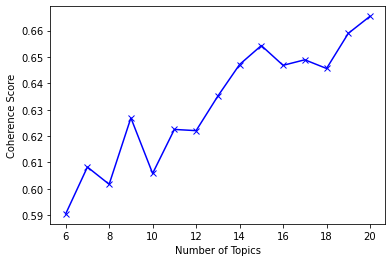

In [ ]:
topics = list(range(6,21))
plt.plot(topics, co_score, 'bx-')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

## Visualizing topics with pyLDAvis

In [ ]:
!pip3 install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=bd045f9212b0d174fec0537608dd85e58a25197d85c3fe53fc4ebdb59528d521
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
# https://cran.r-project.org/web/packages/LDAvis/vignettes/details.pdf
# Here a short legend to explain the vis:
# size of bubble: proportional to the proportions of the topics across the N total tokens in the corpus
# red bars: estimated number of times a given term was generated by a given topic
# blue bars: overall frequency of each term in the corpus
# -- Relevance of words is computed with a parameter lambda
# -- Lambda optimal value ~0.6 (https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf)
%matplotlib inline
# !pip3 install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models
vis = pyLDAvis.gensim_models.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA, mds='mmds')
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

AttributeError: ignored

# LDA Mallet

#### Install/Import Stuff

In [ ]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.15" 2022-04-19
OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1)
OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)


In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2022-07-11 14:22:25--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip [following]
--2022-07-11 14:22:25--  https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  17.0MB/s    in 0.9s    

2022-07-11 14:22:26 (17.0 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.wrappers import LdaMallet
from gensim.models.coherencemodel import CoherenceModel
from gensim import similarities

import os.path
import re
import glob

import nltk
nltk.download('stopwords')

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet' # you should NOT need to change this 
# corpus_path = 'transcripts' # you need to change this path to the directory containing your corpus of .txt files

#### Running LDA Mallet

In [ ]:
lda_mallet = LdaMallet(mallet_path, corpus=corpus, num_topics=8, id2word=dictionary_LDA, alpha = 1000, iterations = 5000, random_seed = 123456)

In [ ]:
lda_mallet.show_topics(num_topics=8,num_words=15)

[(0,
  '0.048*"strip" + 0.031*"next_week" + 0.025*"slice" + 0.020*"stainless_steel" + 0.020*"height" + 0.018*"easily" + 0.017*"batch" + 0.017*"task" + 0.017*"two_axis_machine" + 0.016*"corner" + 0.015*"column" + 0.014*"crank" + 0.013*"fun" + 0.013*"thickness" + 0.013*"center"'),
 (1,
  '0.005*"thickness" + 0.004*"lead_screw" + 0.004*"lift" + 0.004*"manufacturing_process" + 0.003*"pivot" + 0.003*"failure_mode" + 0.003*"robust" + 0.003*"enclosure" + 0.002*"pulley" + 0.002*"rack_pinion" + 0.002*"realize" + 0.002*"grease" + 0.002*"shelf" + 0.002*"simplify" + 0.002*"install"'),
 (2,
  '0.007*"cartridge" + 0.004*"power" + 0.003*"grid" + 0.003*"offset" + 0.003*"solidworks" + 0.003*"chute" + 0.003*"variation" + 0.002*"run_along" + 0.002*"robot" + 0.002*"piston" + 0.002*"spec" + 0.002*"shear" + 0.002*"marble" + 0.002*"longer" + 0.002*"grid_cutter"'),
 (3,
  '0.064*"plunger" + 0.036*"centimeter" + 0.028*"knife" + 0.027*"flap" + 0.023*"per_minute" + 0.018*"oscar" + 0.018*"complete" + 0.016*"wide"

In [ ]:
gensim_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(lda_mallet)

In [ ]:
coherencemodel = CoherenceModel(model=gensim_model, texts=docs_tokens, dictionary=dictionary_LDA, coherence='c_v')
print (coherencemodel.get_coherence())

0.5485442792120002


#### Loop

In [ ]:
mallet_models_list=[]
for n in range(6,15):
  lda_mallet = LdaMallet(mallet_path, corpus=corpus, num_topics=n, id2word=dictionary_LDA, alpha = 5000, iterations = 5000, random_seed = 123456)
  mallet_models_list.append(lda_mallet)

In [ ]:
for n in range(6,15):
  print("Number of Topics = " + str(n))
  for i,topic in mallet_models_list[n-6].show_topics(formatted=True, num_topics=n, num_words=15):
      print(str(i)+": "+ topic)
  gensim_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(mallet_models_list[n-6])
  coherencemodel = CoherenceModel(model=gensim_model, texts=docs_tokens, dictionary=dictionary_LDA, coherence='c_v')
  print("Coherence Score = " + str(coherencemodel.get_coherence()))  
  print()

Number of Topics = 6
0: 0.019*"rotate" + 0.012*"grip" + 0.010*"blade" + 0.009*"start" + 0.008*"work" + 0.008*"belt" + 0.007*"move" + 0.007*"motor" + 0.007*"close" + 0.006*"small" + 0.006*"cutter" + 0.005*"attach" + 0.005*"clamp" + 0.005*"slot" + 0.005*"slide"
1: 0.080*"make" + 0.050*"time" + 0.049*"cut" + 0.045*"put" + 0.033*"design" + 0.032*"cost" + 0.029*"prototype" + 0.026*"paper" + 0.025*"work" + 0.023*"material" + 0.018*"big" + 0.016*"expensive" + 0.016*"back" + 0.016*"end" + 0.016*"place"
2: 0.022*"mechanism" + 0.020*"concept" + 0.015*"push" + 0.013*"rotate" + 0.009*"work" + 0.008*"roll" + 0.008*"prototype" + 0.008*"motor" + 0.007*"finger" + 0.006*"pusher" + 0.006*"happen" + 0.006*"strip" + 0.005*"load" + 0.005*"separate" + 0.005*"hold"
3: 0.026*"machine" + 0.016*"customer" + 0.010*"concept" + 0.009*"question" + 0.008*"process" + 0.007*"twist" + 0.007*"solution" + 0.006*"requirement" + 0.005*"temperature" + 0.005*"space" + 0.005*"approach" + 0.005*"automate" + 0.005*"constraint" 

#### Display topic distribution in document

##### Only show dominant topic

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=gensim_model, corpus=corpus, texts=docs_tokens)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

In [ ]:
df_dominant_topic

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0             0             1.0              0.3725   
1             1             6.0              0.3284   
2             2             5.0              0.3245   
3             3             4.0              0.3536   
4             4             7.0              0.3464   
5             5             1.0              0.3725   
6             6             6.0              0.3284   
7             7             5.0              0.3245   
8             8             4.0              0.3536   
9             9             7.0              0.3464   
10           10             1.0              0.3725   
11           11             6.0              0.3284   
12           12             5.0              0.3245   
13           13             4.0              0.3536   
14           14             7.0              0.3464   
15           15             1.0              0.3725   
16           16             6.0              0.3284   
17           17             5.0              0.3245   
18           18             4.0              0.3536   
19           19             7.0              0.3464   
20           20             1.0              0.3725   
21           21             6.0              0.3284   
22           22             5.0              0.3245   
23           23             4.0              0.3536   
24           24             7.0              0.3464   
25           25             3.0              0.1274   
26           26             1.0              0.3725   
27           27             6.0              0.3284   
28           28             5.0              0.3245   
29           29             4.0              0.3536   
30           30             7.0              0.3464   

                                             Keywords  \
0   customer, machine, constraint, owner, solution...   
1   twist, roll, flap, roller, cellophane, double_...   
2   push, grab, concept, finger, prototype, separa...   
3   bottom, piece, fold, plate, last_week, power, ...   
4   grip, blade, attach, thickness, finger, plate,...   
5   customer, machine, constraint, owner, solution...   
6   twist, roll, flap, roller, cellophane, double_...   
7   push, grab, concept, finger, prototype, separa...   
8   bottom, piece, fold, plate, last_week, power, ...   
9   grip, blade, attach, thickness, finger, plate,...   
10  customer, machine, constraint, owner, solution...   
11  twist, roll, flap, roller, cellophane, double_...   
12  push, grab, concept, finger, prototype, separa...   
13  bottom, piece, fold, plate, last_week, power, ...   
14  grip, blade, attach, thickness, finger, plate,...   
15  customer, machine, constraint, owner, solution...   
16  twist, roll, flap, roller, cellophane, double_...   
17  push, grab, concept, finger, prototype, separa...   
18  bottom, piece, fold, plate, last_week, power, ...   
19  grip, blade, attach, thickness, finger, plate,...   
20  customer, machine, constraint, owner, solution...   
21  twist, roll, flap, roller, cellophane, double_...   
22  push, grab, concept, finger, prototype, separa...   
23  bottom, piece, fold, plate, last_week, power, ...   
24  grip, blade, attach, thickness, finger, plate,...   
25  push, rotate, mechanism, motor, roller, move, ...   
26  customer, machine, constraint, owner, solution...   
27  twist, roll, flap, roller, cellophane, double_...   
28  push, grab, concept, finger, prototype, separa...   
29  bottom, piece, fold, plate, last_week, power, ...   
30  grip, blade, attach, thickness, finger, plate,...   

                                                 Text  
0   [owner, please, find_chew, work_teeth_later, o...  
1   [giant_concept, combine, load_cook_pot, column...  
2   [cheap_pay_duty, custom_sometimes, shipping_ch...  
3   [really_contort, bolt, guess_meet_musab, last_...  
4   [physical_prototype_pick_cello, wraps_pick, tr...  
5   [owner, please, find_chew, work_teeth_later, o...  
6   [giant_concept, combin

##### Show all topics distrubution in a certain document

In [ ]:
team_df = data[data["Team"]==1]
document_list = team_df['Utterance'].to_list()
document = " ".join(document_list)
tokens = word_tokenize(document)
topics = gensim_model.show_topics(formatted=True, num_topics=9, num_words=20)
pd.DataFrame([(el[0], round(el[1],2), topics[el[0]][1]) for el in gensim_model[dictionary_LDA.doc2bow(tokens)]], columns=['topic #', 'weight', 'words in topic'])

topic #  weight                                     words in topic
0        0    0.11  0.010*"bottom" + 0.008*"fold" + 0.007*"easy" +...
1        1    0.16  0.072*"rotate" + 0.066*"mechanism" + 0.044*"pu...
2        2    0.10  0.007*"blade" + 0.007*"attach" + 0.007*"belt" ...
3        3    0.16  0.115*"make" + 0.076*"time" + 0.065*"put" + 0....
4        4    0.18  0.047*"design" + 0.043*"material" + 0.039*"twi...
5        5    0.10  0.017*"customer" + 0.016*"machine" + 0.007*"pr...
6        6    0.10  0.017*"concept" + 0.009*"finger" + 0.007*"mech...
7        7    0.10  0.047*"twist" + 0.014*"double_twist" + 0.011*"...

In [ ]:
team_df = data[data["Team"]==3]
document_list = team_df['Utterance'].to_list()
document = " ".join(document_list)
tokens = word_tokenize(document)
topics = gensim_model.show_topics(formatted=True, num_topics=9, num_words=20)
pd.DataFrame([(el[0], round(el[1],2), topics[el[0]][1]) for el in gensim_model[dictionary_LDA.doc2bow(tokens)]], columns=['topic #', 'weight', 'words in topic'])

topic #  weight                                     words in topic
0        0    0.11  0.010*"bottom" + 0.008*"fold" + 0.007*"easy" +...
1        1    0.14  0.072*"rotate" + 0.066*"mechanism" + 0.044*"pu...
2        2    0.10  0.007*"blade" + 0.007*"attach" + 0.007*"belt" ...
3        3    0.15  0.115*"make" + 0.076*"time" + 0.065*"put" + 0....
4        4    0.17  0.047*"design" + 0.043*"material" + 0.039*"twi...
5        5    0.11  0.017*"customer" + 0.016*"machine" + 0.007*"pr...
6        6    0.11  0.017*"concept" + 0.009*"finger" + 0.007*"mech...
7        7    0.10  0.047*"twist" + 0.014*"double_twist" + 0.011*"...

In [ ]:
team_df = data[data["Team"]==6]
document_list = team_df['Utterance'].to_list()
document = " ".join(document_list)
tokens = word_tokenize(document)
topics = gensim_model.show_topics(formatted=True, num_topics=9, num_words=20)
pd.DataFrame([(el[0], round(el[1],2), topics[el[0]][1]) for el in gensim_model[dictionary_LDA.doc2bow(tokens)]], columns=['topic #', 'weight', 'words in topic'])

topic #  weight                                     words in topic
0        0    0.11  0.010*"bottom" + 0.008*"fold" + 0.007*"easy" +...
1        1    0.14  0.072*"rotate" + 0.066*"mechanism" + 0.044*"pu...
2        2    0.10  0.007*"blade" + 0.007*"attach" + 0.007*"belt" ...
3        3    0.15  0.115*"make" + 0.076*"time" + 0.065*"put" + 0....
4        4    0.16  0.047*"design" + 0.043*"material" + 0.039*"twi...
5        5    0.12  0.017*"customer" + 0.016*"machine" + 0.007*"pr...
6        6    0.11  0.017*"concept" + 0.009*"finger" + 0.007*"mech...
7        7    0.11  0.047*"twist" + 0.014*"double_twist" + 0.011*"...

In [ ]:
team_df = data[data["Team"]==2]
document_list = team_df['Utterance'].to_list()
document = " ".join(document_list)
tokens = word_tokenize(document)
topics = gensim_model.show_topics(formatted=True, num_topics=9, num_words=20)
pd.DataFrame([(el[0], round(el[1],2), topics[el[0]][1]) for el in gensim_model[dictionary_LDA.doc2bow(tokens)]], columns=['topic #', 'weight', 'words in topic'])

topic #  weight                                     words in topic
0        0    0.11  0.010*"bottom" + 0.008*"fold" + 0.007*"easy" +...
1        1    0.16  0.072*"rotate" + 0.066*"mechanism" + 0.044*"pu...
2        2    0.10  0.007*"blade" + 0.007*"attach" + 0.007*"belt" ...
3        3    0.18  0.115*"make" + 0.076*"time" + 0.065*"put" + 0....
4        4    0.17  0.047*"design" + 0.043*"material" + 0.039*"twi...
5        5    0.09  0.017*"customer" + 0.016*"machine" + 0.007*"pr...
6        6    0.10  0.017*"concept" + 0.009*"finger" + 0.007*"mech...
7        7    0.10  0.047*"twist" + 0.014*"double_twist" + 0.011*"...

In [ ]:
team_df = data[data["Team"]==4]
document_list = team_df['Utterance'].to_list()
document = " ".join(document_list)
tokens = word_tokenize(document)
topics = gensim_model.show_topics(formatted=True, num_topics=9, num_words=20)
pd.DataFrame([(el[0], round(el[1],2), topics[el[0]][1]) for el in gensim_model[dictionary_LDA.doc2bow(tokens)]], columns=['topic #', 'weight', 'words in topic'])

topic #  weight                                     words in topic
0        0    0.10  0.010*"bottom" + 0.008*"fold" + 0.007*"easy" +...
1        1    0.15  0.072*"rotate" + 0.066*"mechanism" + 0.044*"pu...
2        2    0.09  0.007*"blade" + 0.007*"attach" + 0.007*"belt" ...
3        3    0.16  0.115*"make" + 0.076*"time" + 0.065*"put" + 0....
4        4    0.20  0.047*"design" + 0.043*"material" + 0.039*"twi...
5        5    0.10  0.017*"customer" + 0.016*"machine" + 0.007*"pr...
6        6    0.10  0.017*"concept" + 0.009*"finger" + 0.007*"mech...
7        7    0.10  0.047*"twist" + 0.014*"double_twist" + 0.011*"...

In [ ]:
team_df = data[data["Team"]==5]
document_list = team_df['Utterance'].to_list()
document = " ".join(document_list)
tokens = word_tokenize(document)
topics = gensim_model.show_topics(formatted=True, num_topics=9, num_words=20)
pd.DataFrame([(el[0], round(el[1],2), topics[el[0]][1]) for el in gensim_model[dictionary_LDA.doc2bow(tokens)]], columns=['topic #', 'weight', 'words in topic'])

topic #  weight                                     words in topic
0        0    0.11  0.010*"bottom" + 0.008*"fold" + 0.007*"easy" +...
1        1    0.15  0.072*"rotate" + 0.066*"mechanism" + 0.044*"pu...
2        2    0.09  0.007*"blade" + 0.007*"attach" + 0.007*"belt" ...
3        3    0.17  0.115*"make" + 0.076*"time" + 0.065*"put" + 0....
4        4    0.20  0.047*"design" + 0.043*"material" + 0.039*"twi...
5        5    0.10  0.017*"customer" + 0.016*"machine" + 0.007*"pr...
6        6    0.09  0.017*"concept" + 0.009*"finger" + 0.007*"mech...
7        7    0.09  0.047*"twist" + 0.014*"double_twist" + 0.011*"...

#TF-IDF model & KMeans Clustering

In [ ]:
bigram_model = Phrases(tokens)
trigram_model = Phrases(bigram_model[tokens], min_count=5, threshold=10)
tokens = list(trigram_model[bigram_model[tokens]])

In [ ]:
not_important_words = frequent_words
for n in range(len(tokens)):
  for word in tokens[n]:
    if word in not_important_words:
      tokens[n].remove(word)

In [ ]:
dictionary_LDA = corpora.Dictionary(tokens)
dictionary_LDA.filter_extremes(no_below=5, no_above = 0.8, keep_n= 100000)
corpus = [dictionary_LDA.doc2bow(tok) for tok in tokens]

In [ ]:
word_weight =[]
for doc in corpus:
  for id, freq in doc:
    word_weight.append([dictionary_LDA[id], freq])
print(word_weight)

[['jar', 1], ['owner', 1], ['product', 1], ['suppose', 1], ['please', 1], ['pretty', 1], ['try', 1], ['believe', 1], ['find', 1], ['later', 1], ['today', 1], ['work', 1], ['bring', 1], ['oscar', 1], ['sell', 1], ['tell', 1], ['jar', 1], ['feel', 1], ['hand', 1], ['look', 2], ['half', 1], ['honestly', 1], ['properly', 1], ['tie', 1], ['nice', 1], ['soft', 1], ['ask', 1], ['funny', 1], ['give', 1], ['somebody', 2], ['wow', 1], ['feel', 2], ['look', 2], ['home', 2], ['clearly', 1], ['happen', 1], ['unwrap', 1], ['many', 1], ['record', 1], ['shop', 1], ['feel', 1], ['look', 1], ['aluminum', 1], ['caramel', 2], ['different', 1], ['document', 1], ['everything', 1], ['exactly', 1], ['fold', 1], ['hard', 1], ['mass_produce', 1], ['online', 1], ['paper', 2], ['sort', 1], ['square', 2], ['together', 1], ['area', 1], ['game', 1], ['manufacturer', 2], ['place', 1], ['guess', 1], ['probably', 1], ['ask', 1], ['shop', 2], ['place', 1], ['approach', 1], ['box', 1], ['chocolate', 1], ['last_week', 1],

In [ ]:
from gensim import models
# create TF-IDF model
tfIdf = models.TfidfModel(corpus, smartirs ='ntc')
corpus_tfidf = tfIdf[corpus]
 
# TF-IDF Word Weight
weight_tfidf =[]
for doc in tfIdf[corpus]:
  for id, freq in doc:
    weight_tfidf.append([dictionary_LDA[id], np.around(freq, decimals = 3)])
print(weight_tfidf) 

[['jar', 0.536], ['owner', 0.508], ['product', 0.484], ['suppose', 0.468], ['please', 0.705], ['pretty', 0.572], ['try', 0.419], ['believe', 0.475], ['find', 0.364], ['later', 0.589], ['today', 0.477], ['work', 0.259], ['bring', 1.0], ['oscar', 0.637], ['sell', 0.589], ['tell', 0.497], ['jar', 1.0], ['feel', 0.541], ['hand', 0.497], ['look', 0.678], ['half', 0.433], ['honestly', 0.49], ['properly', 0.476], ['tie', 0.589], ['nice', 0.62], ['soft', 0.784], ['ask', 0.276], ['funny', 0.422], ['give', 0.231], ['somebody', 0.717], ['wow', 0.422], ['feel', 0.581], ['look', 0.364], ['home', 0.728], ['clearly', 0.702], ['happen', 0.36], ['unwrap', 0.614], ['many', 0.453], ['record', 0.625], ['shop', 0.636], ['feel', 0.208], ['look', 0.13], ['aluminum', 0.257], ['caramel', 0.382], ['different', 0.15], ['document', 0.27], ['everything', 0.162], ['exactly', 0.183], ['fold', 0.196], ['hard', 0.192], ['mass_produce', 0.301], ['online', 0.263], ['paper', 0.283], ['sort', 0.185], ['square', 0.433], ['

In [ ]:
from gensim.matutils import corpus2dense, corpus2csc
corpus_tfidf_dense = corpus2dense(corpus_tfidf, len(dictionary_LDA.keys()), dictionary_LDA.num_docs)
# corpus_tfidf_sparse = corpus2csc(corpus_tfidf, len(dictionary_LDA.keys()), dictionary_LDA.num_docs)

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=8)
clusters = model.fit_predict(corpus_tfidf_dense.T)

In [ ]:
print(clusters)

[7 7 4 ... 0 7 7]


In [ ]:
print(tokens)

[['jar', 'owner', 'product', 'suppose'], ['please', 'try', 'pretty'], ['believe', 'find', 'chew', 'work', 'teeth', 'later', 'today'], ['bring'], ['oscar', 'tell', 'sell', 'vincenzo'], [], ['jar'], [], ['look', 'feel', 'look', 'hand'], ['honestly', 'half', 'tie', 'properly'], ['nice', 'soft'], ['ask', 'somebody', 'funny', 'give', 'somebody', 'wow', 'tamper'], ['look', 'feel', 'home', 'home', 'look', 'feel'], ['clearly', 'intend', 'unwrap', 'happen'], ['record', 'many', 'shop'], ['look', 'online', 'document', 'together', 'different', 'hard', 'aluminum', 'foil', 'mass_produce', 'caramel', 'fold', 'square', 'square', 'caramel', 'everything', 'artisan', 'feel', 'handcraft', 'exactly', 'paper', 'wax', 'paper', 'sort'], ['manufacturer', 'area', 'besides', 'manufacturer', 'place', 'game', 'town'], ['guess', 'probably'], ['whenever', 'last_week', 'approach', 'shop', 'place', 'start', 'ask', 'outside', 'box', 'lot', 'chocolate', 'shop'], ['google', 'look', 'sort', 'google', 'seem', 'find', 'manu

In [ ]:
utterance_list = data['Utterance'].tolist()

In [ ]:
dict_of_clusters = {}


In [ ]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
for i in range(8):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % tokens[ind]),
    print

Top terms per cluster:
Cluster 0:
 []
 ['useful', 'video', 'mention', 'pinch', 'close', 'possible', 'start', 'twist', 'specific', 'hold', 'start', 'twist', 'guess', 'incorporate']
 ['start', 'first', 'remove', 'stack', 'back', 'spring', 'four', 'spring', 'platform', 'base', 'essentially', 'stick', 'underneath', 'ledge', 'spring', 'compress', 'load', 'platform', 'keep', 'spring', 'load']
 ['way', 'differently']
 ['feed_rate', 'rate', 'another', 'ergonomics', 'effect', 'prevent', 'carpal_tunnel_syndrome', 'hand', 'high', 'rate', 'try', 'figure', 'focus', 'obviously', 'focus', 'equally', 'become', 'try', 'become', 'difficult']
 ['per_minute', 'bit', 'less', 'half', 'minute', 'half', 'second', 'less', 'two_second']
 ['little', 'lip', 'place', 'discrepancy', 'hold_place', 'hold_place']
 ['guess', 'probably']
 ['freeze', 'essentially', 'water', 'fluid', 'caramel', 'water', 'expands', 'freeze', 'little_bit', 'big']
 ['couple', 'grand']
Cluster 1:
 ['ed', 'today', 'criterion']
 ['project', 'bu

In [ ]:
cluster_df = pd.DataFrame({'Cluster':clusters, 'Tokens': tokens})
cluster_df

Cluster                                             Tokens
0           7                     [jar, owner, product, suppose]
1           7                              [please, try, pretty]
2           4   [believe, find, chew, work, teeth, later, today]
3           7                                            [bring]
4           7                      [oscar, tell, sell, vincenzo]
...       ...                                                ...
5296        7         [easy, gear, opinion, rack, opinion, fine]
5297        7                                         [optimize]
5298        0                               [small, crank, much]
5299        7  [calculation, full, rotation, quick_return, sl...
5300        7  [coincidence, since, degree, motor, big, lengt...

[5301 rows x 2 columns]